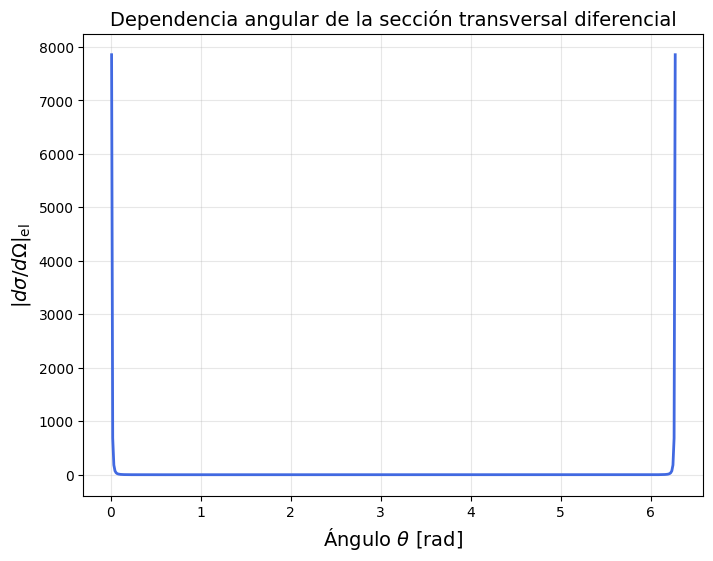

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
E = 100      # energía arbitraria
gamma = -1.0   # parámetro del potencial (puedes probar gamma < 0 también)

# Ángulo de dispersión (evitar 0 y 2π para evitar singularidades)
theta = np.linspace(0.01, 2*np.pi - 0.01, 500)

# Expresión de la sección diferencial
dsigma_domega = (gamma * np.pi**2 / (E * np.sin(theta))) * ((np.pi - theta) / (theta**2 * (2*np.pi - theta)**2))

# Gráfica
plt.figure(figsize=(8,6))
plt.plot(theta, np.abs(dsigma_domega), color='royalblue', lw=2)
plt.xlabel(r'Ángulo $\theta$ [rad]', fontsize=14)
plt.ylabel(r'$|d\sigma/d\Omega|_{\text{el}}$', fontsize=14)
plt.title('Dependencia angular de la sección transversal diferencial', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()


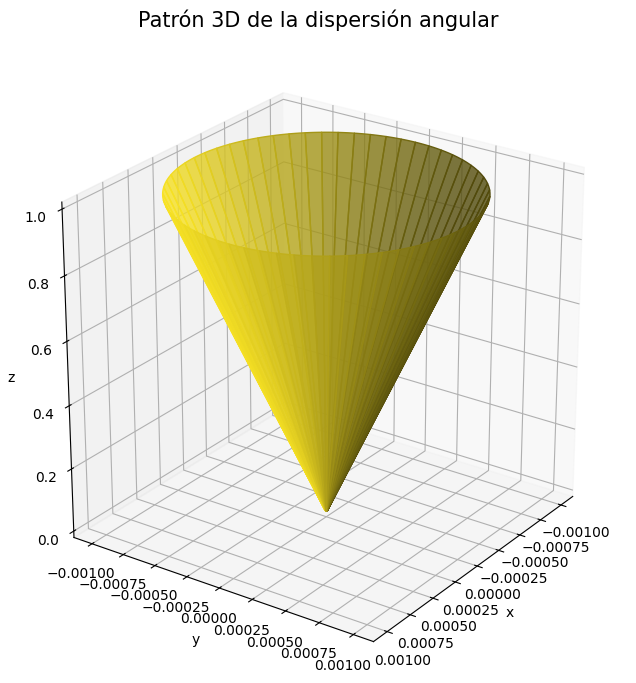

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros
E = 1.0
gamma = 1.0  # repulsivo
theta = np.linspace(1e-3, np.pi - 1e-3, 300)
phi = np.linspace(0, 2*np.pi, 300)

# Mallado angular
THETA, PHI = np.meshgrid(theta, phi)

# Sección diferencial
def dsigma_domega(theta, gamma, E):
    return np.abs(gamma * np.pi**2 / (E * np.sin(theta) * theta**2 * (2*np.pi - theta)**2) * (np.pi - theta))

R = dsigma_domega(THETA, gamma, E)
R = R / np.max(R)  # Normalizar para visualizar

# Coordenadas cartesianas
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

# Gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, facecolors=plt.cm.viridis(R), rstride=5, cstride=5, alpha=0.8)

# Ajustes visuales
ax.set_title("Patrón 3D de la dispersión angular", fontsize=15, pad=20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=25, azim=35)
ax.set_box_aspect([1,1,1])

plt.show()
